In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
data = sns.load_dataset('titanic')

In [4]:
data.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [5]:
data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

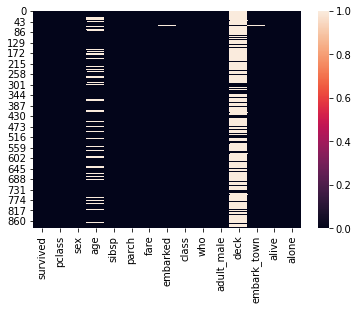

In [6]:
# plot heatmap to visualize the null values in each column
# 'cbar = False' does not show the color axis 
sns.heatmap(data.isnull())

# display the plot
plt.show()

In [7]:
# Replace null value in age column
data['age']=data['age'].fillna(data['age'].mean())

Replace null values  Replace null value in embarked and fare classes with mode. or median.

In [8]:
## Replace null value in embarked and fare classes with mode or median
data['embarked'].fillna(data['embarked'].mode()[0],inplace=True)
#checking :
data[data['embarked'].isnull()==True]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone


In [9]:
#replacing for deck column
print(data[data.deck.isnull()==True])
data['deck'].fillna(data.deck.mode()[0],inplace=True)
#checking
print(data[data.deck.isnull()==True])

     survived  pclass     sex        age  ...  deck  embark_town  alive  alone
0           0       3    male  22.000000  ...   NaN  Southampton     no  False
2           1       3  female  26.000000  ...   NaN  Southampton    yes   True
4           0       3    male  35.000000  ...   NaN  Southampton     no   True
5           0       3    male  29.699118  ...   NaN   Queenstown     no   True
7           0       3    male   2.000000  ...   NaN  Southampton     no  False
..        ...     ...     ...        ...  ...   ...          ...    ...    ...
884         0       3    male  25.000000  ...   NaN  Southampton     no   True
885         0       3  female  39.000000  ...   NaN   Queenstown     no  False
886         0       2    male  27.000000  ...   NaN  Southampton     no   True
888         0       3  female  29.699118  ...   NaN  Southampton     no  False
890         0       3    male  32.000000  ...   NaN   Queenstown     no   True

[688 rows x 15 columns]
Empty DataFrame
Columns: [s

Question -- Drop fare column.

In [10]:
 data=data.drop(['fare'],axis=1)

In [11]:
data.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'embarked',
       'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone'],
      dtype='object')

Question - - Average age of the woman passengers:




In [16]:
 data[data['sex']=='female'].age.mean()

28.216730048707397

Question -- Average age of the male passengers.

In [17]:
  data[data['sex']=='male'].age.mean()

30.50582424304206

Question -- The max age among the male passengers:

In [18]:
  data[data['sex']=='male'].age.max()

80.0

Question -- Create a new column age2 = age +12

In [20]:
 data['age2']=data['age']+12
 data.head()

,survived,pclass,sex,age,sibsp,parch,embarked,class,who,adult_male,deck,embark_town,alive,alone,age2
0,0,3,male,22.0,1,0,S,Third,man,True,C,Southampton,no,False,34.0
1,1,1,female,38.0,1,0,C,First,woman,False,C,Cherbourg,yes,False,50.0
2,1,3,female,26.0,0,0,S,Third,woman,False,C,Southampton,yes,True,38.0
3,1,1,female,35.0,1,0,S,First,woman,False,C,Southampton,yes,False,47.0
4,0,3,male,35.0,0,0,S,Third,man,True,C,Southampton,no,True,47.0


Question -- The min age among the female passengers:

In [22]:
data[data['sex']=='female'].age.min()

0.75

Question -- The min age among the alive male passengers.

In [23]:
 data[(data['sex']=='male') & (data['alive']=='yes')].age.min()

0.42

Question -- Average age of the **male** passengers in First or Second class:

In [24]:
#Rename columns class
data[(data['sex']=='male') & ((data['pclass']==1) | (data['pclass']==2))].age.mean()

35.233580562659874

Question -- Total age of embarked equals to S or C.

In [25]:
 data[(data['embarked']=='S') | (data['embarked']=='C')].age.sum()

24220.157058823526

Question -- Sort the DataFrame in ascending order of the 'age' use sort values (df.sort_values(by='...', ascending=...)).

In [26]:
data.sort_values(by='age',ascending=True)

,survived,pclass,sex,age,sibsp,parch,embarked,class,who,adult_male,deck,embark_town,alive,alone,age2
803,1,3,male,0.42,0,1,C,Third,child,False,C,Cherbourg,yes,False,12.42
755,1,2,male,0.67,1,1,S,Second,child,False,C,Southampton,yes,False,12.67
644,1,3,female,0.75,2,1,C,Third,child,False,C,Cherbourg,yes,False,12.75
469,1,3,female,0.75,2,1,C,Third,child,False,C,Cherbourg,yes,False,12.75
831,1,2,male,0.83,1,1,S,Second,child,False,C,Southampton,yes,False,12.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,0,3,male,70.50,0,0,Q,Third,man,True,C,Queenstown,no,True,82.50
96,0,1,male,71.00,0,0,C,First,man,True,A,Cherbourg,no,True,83.00
493,0,1,male,71.00,0,0,C,First,man,True,C,Cherbourg,no,True,83.00
851,0,3,male,74.00,0,0,S,Third,man,True,C,Southampton,no,True,86.00


**Aggregating**


Documentation : https://pbpython.com/groupby-agg.html


Aggregation function is one which takes multiple individual values and returns a summary.

The most common aggregation functions are a simple average or summation of values.

Here’s a quick example of calculating the total and average fare using the Titanic dataset (loaded from seaborn):

In [29]:
#using a list
df=sns.load_dataset('titanic')
df['fare'].agg(['sum','mean'])

sum     28693.949300
mean       32.204208
Name: fare, dtype: float64

In [30]:
#using a dictionary
df.agg({'fare':['mean','sum']})

,fare
mean,32.204208
sum,28693.949300


Question -- Average age for each embark_town. Use the groupby() method.


In [31]:
data.groupby('embarked').age.mean()

embarked
C    30.562419
Q    29.113724
S    29.544382
Name: age, dtype: float64

Average age of each embark_town. Use the pivot_table() method.


Pivot Table

Documentation : 

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html

In [32]:
 pd.pivot_table(data,values='age',index='embark_town',aggfunc=np.mean)

,age
embark_town,
Cherbourg,30.562419
Queenstown,29.113724
Southampton,29.480855


Question -- Average age and age2 for each embark_town. Use the groupby() method. 

In [33]:
data.groupby('embark_town')['age','age2'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,age,age2
embark_town,,
Cherbourg,30.562419,42.562419
Queenstown,29.113724,41.113724
Southampton,29.480855,41.480855


Question -- Total age for each embark_town and class in one code sentence. Use the pivot_table() method. Fill the missing values with 0.

In [34]:
 pd.pivot_table(data,'age','embark_town','class',np.sum)

class,First,Second,Third
embark_town,,,
Cherbourg,3140.690294,400.898235,1592.897941
Queenstown,77.000000,116.699118,2048.057647
Southampton,4684.703235,4977.922941,9323.044412


Total age2 of age equal to 22 and 38:

In [35]:
data[(data['age']==22) | (data['age']==38)].age2.sum()

1468.0

Question -- Print a frequency table of 'who' use 'value_counts()'


In [37]:
data['who'].value_counts()

man      537
woman    271
child     83
Name: who, dtype: int64

Question -- Sort the DataFrame in ascending order of the 'embark_town'. Show the top 20.

In [38]:
data.sort_values(by='embark_town',ascending=True)

,survived,pclass,sex,age,sibsp,parch,embarked,class,who,adult_male,deck,embark_town,alive,alone,age2
258,1,1,female,35.000000,0,0,C,First,woman,False,C,Cherbourg,yes,True,47.000000
125,1,3,male,12.000000,1,0,C,Third,child,False,C,Cherbourg,yes,False,24.000000
354,0,3,male,29.699118,0,0,C,Third,man,True,C,Cherbourg,no,True,41.699118
352,0,3,male,15.000000,1,1,C,Third,child,False,C,Cherbourg,no,False,27.000000
128,1,3,female,29.699118,1,1,C,Third,woman,False,F,Cherbourg,yes,False,41.699118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,0,3,male,28.000000,0,0,S,Third,man,True,C,Southampton,no,True,40.000000
344,0,2,male,36.000000,0,0,S,Second,man,True,C,Southampton,no,True,48.000000
445,1,1,male,4.000000,0,2,S,First,child,False,A,Southampton,yes,False,16.000000
61,1,1,female,38.000000,0,0,S,First,woman,False,B,NaN,yes,True,50.000000
